## In-Depth Tutorial on Naive Bayes

### Mathematical Background

Naive Bayes classifiers are based on Bayes' Theorem, which uses probability to predict the class of unknown data points. Bayes' Theorem is stated mathematically as follows:

$$
P(C_k \mid x) = \frac{P(x \mid C_k) \cdot P(C_k)}{P(x)}
$$

Where:
- $P(C_k \mid x)$ is the posterior probability of class $C_k$ given predictor(s) $x$.
- $P(C_k)$ is the prior probability of class $C_k$.
- $P(x \mid C_k)$ is the likelihood, which is the probability of predictor $x$ given class $C_k$.
- $P(x)$ is the prior probability of predictor $x$.

The Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. This is what is meant by the term "naive."

### Numerical Example

Suppose we have a dataset with weather conditions and we want to predict whether the weather is suitable for playing tennis.

**Dataset**:

| Outlook  | Windy | Play Tennis |
|----------|-------|-------------|
| Sunny    | False | No          |
| Overcast | True  | Yes         |
| Rainy    | False | Yes         |

1. Calculate prior probabilities:
   - $P(Yes) = \frac{\text{Number of days with 'Yes'}}{\text{Total number of days}}$
   - $P(No) = \frac{\text{Number of days with 'No'}}{\text{Total number of days}}$

2. Calculate likelihood:
   - $P(Sunny \mid No)$, $P(Overcast \mid Yes)$, etc.

3. Apply Bayes' Theorem for prediction.



## Handling Zero Probability with Laplace Smoothing in Naive Bayes

### Introduction to Laplace Smoothing
Laplace Smoothing, or additive smoothing, is a technique used to handle the problem of zero probability in categorical data analysis, especially in Bayesian classification methods like Naive Bayes. This approach helps avoid the problem where the absence of certain feature-class combinations in the training data leads to zero probability estimates, which can disrupt model predictions.

### Mathematical Concept
In Naive Bayes, the likelihood $P(x_i \mid C_k)$ is calculated as the probability of feature $x_i$ given class $C_k$. To prevent zero probabilities, Laplace Smoothing modifies the likelihood calculation as follows:

$$
P(x_i \mid C_k) = \frac{N_{x_i, C_k} + \alpha}{N_{C_k} + \alpha \cdot d}
$$

Where:
- $N_{x_i, C_k}$ is the number of times feature $x_i$ appears in samples from class $C_k$.
- $N_{C_k}$ is the total count of all samples in class $C_k$.
- $\alpha$ is the smoothing parameter (usually set to 1).
- $d$ is the number of distinct values that feature $x_i$ can take.

### Numerical Example
Suppose we are building a spam classifier and our dataset involves observing the words "free" and "win" in emails, classified as spam or not spam. Consider a scenario where the word "win" has never appeared in a 'not spam' email in the training data.

**Training Data:**

| Email Text     | Is Spam |
|----------------|---------|
| win a prize    | Yes     |
| free vacation  | Yes     |
| free money     | Yes     |
| nice day       | No      |
| good morning   | No      |

**Calculation without Smoothing:**

- $P(\text{"win"} \mid \text{Spam})$ might be non-zero.
- $P(\text{"win"} \mid \text{Not Spam})$ would be zero.

**Applying Laplace Smoothing:**

Let's calculate $P(\text{"win"} \mid \text{Not Spam})$ with $\alpha = 1$ and $d = 2$ (since there are two distinct words considered).

$$
P(\text{"win"} \mid \text{Not Spam}) = \frac{0 + 1}{4 + 2 \cdot 1} = \frac{1}{6}
$$

This adjustment prevents the probability from being zero and allows the classifier to handle new or rare occurrences more gracefully.

### Conclusion
Laplace Smoothing is essential for ensuring robustness in Naive Bayes classifiers, particularly in scenarios like text classification where the vocabulary may introduce unseen words in new documents. This method effectively addresses the zero-frequency problem by assuming a prior probability for unseen events.


## Naive Bayes: Assumptions, Advantages, and Disadvantages

### Assumptions Behind Naive Bayes
Naive Bayes classifier relies on several crucial assumptions:
- **Conditional Independence**: Assumes that features are independent of each other, given the class label.
- **Feature Relevance**: Assumes all features are equally relevant to the outcome.
- **Prior Knowledge**: The model requires prior probabilities of classes (based on previous knowledge or determined from the training data).

### Advantages of Naive Bayes
Naive Bayes offers several compelling benefits:
- **Efficiency**: Extremely efficient in terms of computational resources and time, making it suitable for large datasets.
- **Ease of Implementation**: Straightforward to implement and understand.
- **Performance**: Often performs well in many scenarios, especially in document classification and spam filtering.
- **Scalability**: Handles an increasing amount of data smoothly.
- **Good Estimator**: Provides reasonable probability estimates for prediction.

### Disadvantages and Drawbacks of Naive Bayes
Despite its advantages, Naive Bayes has notable limitations:
- **Feature Independence Assumption**: This can be a major drawback if features are correlated, which is often the case in real-world data.
- **Data Scarcity**: The probability estimates from Naive Bayes can be skewed if the data set is small, leading to zero-frequency problems.
- **Biased Estimates**: Naive Bayes’ estimators can be biased if the categorical variables have a category in the test data set, which was not observed in the training data set.

### Conclusion
Naive Bayes remains a popular choice for classification tasks where computational efficiency and simplicity are prioritized over exact precision, particularly in text classification tasks. Understanding these aspects helps leverage its strengths while being aware of situations where it may underperform.



Accuracy without smoothing: 0.8195488721804511


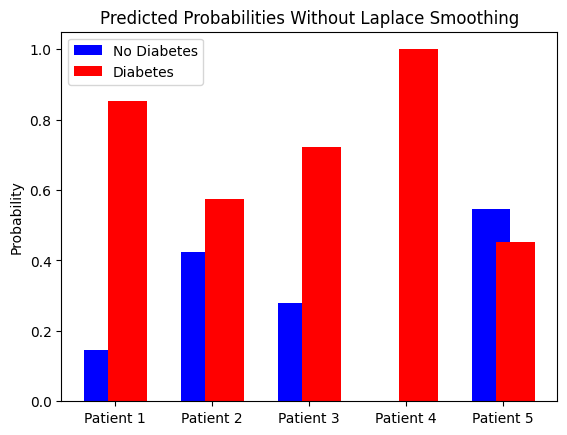

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_diabetes
from sklearn.metrics import accuracy_score

# Load data
data = load_diabetes()
X = data.data
y = (data.target > 140).astype(int)  # Convert to binary classification problem

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy without smoothing: {accuracy_score(y_test, y_pred)}")

# Laplace Smoothing is typically included in categorical models like MultinomialNB, but here we use GaussianNB for illustration
# For a real application of smoothing, you would modify probability calculations in a custom implementation or use a categorical model

# Probabilities visualization
prob_no_smoothing = model.predict_proba(X_test[:5])

# Plotting function for probabilities
def plot_probabilities(probs, title):
    fig, ax = plt.subplots()
    for i, prob in enumerate(probs):
        ax.bar(i * 2, prob[0], label='No Diabetes' if i == 0 else "", color='b')
        ax.bar(i * 2 + 0.5, prob[1], label='Diabetes' if i == 0 else "", color='r')
    ax.set_title(title)
    ax.set_ylabel('Probability')
    ax.set_xticks([i * 2 + 0.25 for i in range(5)])
    ax.set_xticklabels([f'Patient {i+1}' for i in range(5)])
    ax.legend()

plot_probabilities(prob_no_smoothing, 'Predicted Probabilities Without Laplace Smoothing')
plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml

# Load data from OpenML
data = fetch_openml(name='nursery', version=1, as_frame=True)
X, y = data.data, data.target

# Encode categorical data
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Training Categorical Naive Bayes model with Laplace Smoothing
model = CategoricalNB(alpha=1.0)  # Using alpha=1.0 for Laplace Smoothing
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Laplace Smoothing: {accuracy}")

# Predict probabilities for a subset of test data
probabilities = model.predict_proba(X_test[:10])

print(f"Probabilities: {probabilities}")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy with Laplace Smoothing: 0.9025205761316872
Probabilities: [[9.99243339e-01 3.20033917e-04 4.35024415e-04 1.60225666e-06]
 [3.44380999e-04 6.06677406e-01 3.92670805e-01 3.07407762e-04]
 [3.68283249e-04 8.64282407e-01 1.35331688e-01 1.76213247e-05]
 [1.51917485e-04 2.49998400e-02 9.74848237e-01 5.01554518e-09]
 [9.99135201e-01 5.12172983e-04 1.57968073e-04 1.94657752e-04]
 [3.20701554e-04 6.77667158e-01 2.81904201e-01 4.01079391e-02]
 [9.99426576e-01 9.69059575e-05 4.71743795e-04 4.77432843e-06]
 [4.41258960e-04 6.97755518e-01 2.87894769e-01 1.39084540e-02]
 [3.39583505e-04 6.36222879e-01 3.42574654e-01 2.08628834e-02]
 [3.25920247e-04 9.07902387e-01 8.82604383e-02 3.51125462e-03]]
